# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [4]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = './input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

#helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

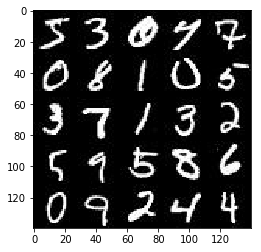

In [72]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

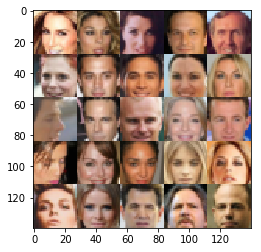

In [5]:
show_n_images = 25

%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of **-0.5 to 0.5** of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function


    real_img = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    z = tf.placeholder(tf.float32, shape=[None,  z_dim], name='input_fake')
    lr = tf.placeholder(tf.float32, shape=None, name='learning_rate')
    
    return real_img, z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [36]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
   
    # TODO: Implement Function
    alpha = 0.1 #Reviewer suggested alpha = (0.08, 0.15)
    with tf.variable_scope('discriminator', reuse=reuse):
    
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None, 
                             kernel_initializer=tf.contrib.layers.xavier_initializer())
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', activation=None,
                             kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*x2, x2)
        #x2 = tf.nn.dropout(x2, keep_prob = 0.5)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', activation=None,
                             kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*x3, x3)
        #x3 = tf.nn.dropout(x3, keep_prob = 0.5)
        #Reviewer commented that I don't need to use dropout because the batch_normalization was already applied
        #And, If I want to use drop_out, maintain keep_prob (0.6, 0.9)
        
        flat = tf.reshape(x3, (-1, 4*4*256))
        
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
    
        return out, logits




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [35]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.1 #Reviewer suggested alpha = (0.08, 0.15)
    with tf.variable_scope('generator', reuse=not is_train): 
     
    # TODO: Implement Function
        x1 = tf.layers.dense(z, 7*7*512,
                             kernel_initializer=tf.contrib.layers.xavier_initializer()) #to reach 28x28xout_channel_dim
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        #7 7 512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same', activation=None,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer())        
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)        
        # 14 14 256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same', activation=None,
                                       kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        # 28 28 128
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same', 
                                            activation=None,
                                           kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        
        out = tf.tanh(logits)
        
    
    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [14]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    smoothing = 0.9 #following the reviewer's comment. 
    # The reviewer: Please try using smoothing by reducing labels to say 0.9, 
    # as it prevents discriminator from being to strong and to generalize in a better way.
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*smoothing))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss
#From DCGAN



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    #getting weights and bias to updates
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    #Optimize
    #tf.control_dependencies: the batch normalization layers can
    # update their population statistics
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [17]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
#    print(input_real)
#    print(input_z)
#    print(learning_rate)
#    print(lr)
    
    
    losses = []
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps = steps + 1
                
                batch_images = batch_images*2 #data range: -0.5 to 0.5
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))                
                
                _ = sess.run(d_opt, feed_dict={
                    input_real: batch_images,
                    input_z: batch_z,
                    lr: learning_rate})
                
                _ = sess.run(g_opt, feed_dict={
                    input_real: batch_images,
                    input_z: batch_z,                    
                    lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z,
                                                input_real: batch_images })
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess,
                                          16,
                                          input_z,
                                          data_shape[3],
                                          data_image_mode)                
        
        show_generator_output(sess,
                          16,
                          input_z,
                          data_shape[3],
                          data_image_mode)
        return losses
                                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Tensor("input_real:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("input_fake:0", shape=(?, 100), dtype=float32)
0.0002
Tensor("learning_rate:0", dtype=float32)
Epoch 1/2... Discriminator Loss: 0.5072... Generator Loss: 1.4624
Epoch 1/2... Discriminator Loss: 0.4621... Generator Loss: 2.2793
Epoch 1/2... Discriminator Loss: 0.9777... Generator Loss: 3.0490
Epoch 1/2... Discriminator Loss: 1.0489... Generator Loss: 0.7605
Epoch 1/2... Discriminator Loss: 0.8382... Generator Loss: 1.6609
Epoch 1/2... Discriminator Loss: 0.7925... Generator Loss: 2.0317
Epoch 1/2... Discriminator Loss: 1.0733... Generator Loss: 1.0815
Epoch 1/2... Discriminator Loss: 0.9694... Generator Loss: 1.0550
Epoch 1/2... Discriminator Loss: 1.2263... Generator Loss: 3.2729
Epoch 1/2... Discriminator Loss: 0.8742... Generator Loss: 1.0500


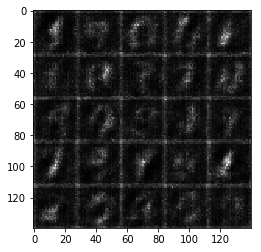

Epoch 1/2... Discriminator Loss: 1.5936... Generator Loss: 0.7886
Epoch 1/2... Discriminator Loss: 1.2307... Generator Loss: 1.2434
Epoch 1/2... Discriminator Loss: 1.7162... Generator Loss: 2.1942
Epoch 1/2... Discriminator Loss: 1.6555... Generator Loss: 0.9256
Epoch 1/2... Discriminator Loss: 1.3595... Generator Loss: 0.9195
Epoch 1/2... Discriminator Loss: 1.7616... Generator Loss: 0.8371
Epoch 1/2... Discriminator Loss: 1.6625... Generator Loss: 0.7887
Epoch 1/2... Discriminator Loss: 0.9828... Generator Loss: 1.8403
Epoch 1/2... Discriminator Loss: 1.1266... Generator Loss: 0.9953
Epoch 1/2... Discriminator Loss: 1.1749... Generator Loss: 1.5599


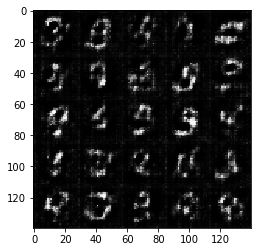

Epoch 1/2... Discriminator Loss: 1.4910... Generator Loss: 1.0165
Epoch 1/2... Discriminator Loss: 1.1777... Generator Loss: 1.1541
Epoch 1/2... Discriminator Loss: 1.0235... Generator Loss: 1.1730
Epoch 1/2... Discriminator Loss: 1.4164... Generator Loss: 0.9669
Epoch 1/2... Discriminator Loss: 1.0744... Generator Loss: 1.0695
Epoch 1/2... Discriminator Loss: 1.3259... Generator Loss: 1.4134
Epoch 1/2... Discriminator Loss: 1.2964... Generator Loss: 1.5732
Epoch 1/2... Discriminator Loss: 1.1445... Generator Loss: 1.5551
Epoch 1/2... Discriminator Loss: 1.0224... Generator Loss: 1.0322
Epoch 1/2... Discriminator Loss: 1.0934... Generator Loss: 1.1560


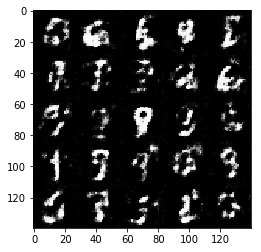

Epoch 1/2... Discriminator Loss: 0.9329... Generator Loss: 1.9434
Epoch 1/2... Discriminator Loss: 1.2248... Generator Loss: 1.2748
Epoch 1/2... Discriminator Loss: 1.4157... Generator Loss: 1.6047
Epoch 1/2... Discriminator Loss: 1.4991... Generator Loss: 0.8567
Epoch 1/2... Discriminator Loss: 0.9724... Generator Loss: 1.5580
Epoch 1/2... Discriminator Loss: 1.3641... Generator Loss: 2.0608
Epoch 1/2... Discriminator Loss: 1.1975... Generator Loss: 1.3068
Epoch 1/2... Discriminator Loss: 1.0176... Generator Loss: 1.5681
Epoch 1/2... Discriminator Loss: 0.9336... Generator Loss: 1.3234
Epoch 1/2... Discriminator Loss: 1.0164... Generator Loss: 0.9540


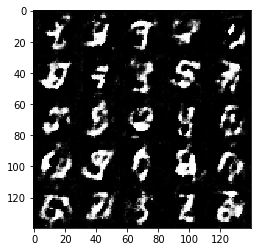

Epoch 1/2... Discriminator Loss: 1.4741... Generator Loss: 0.6912
Epoch 1/2... Discriminator Loss: 0.6142... Generator Loss: 2.1709
Epoch 1/2... Discriminator Loss: 1.1970... Generator Loss: 0.9902
Epoch 1/2... Discriminator Loss: 1.1143... Generator Loss: 1.6042
Epoch 1/2... Discriminator Loss: 0.7294... Generator Loss: 1.7281
Epoch 1/2... Discriminator Loss: 1.1448... Generator Loss: 1.4171
Epoch 1/2... Discriminator Loss: 0.9118... Generator Loss: 2.1569
Epoch 1/2... Discriminator Loss: 0.7138... Generator Loss: 1.9694
Epoch 1/2... Discriminator Loss: 0.7483... Generator Loss: 1.1683
Epoch 1/2... Discriminator Loss: 1.1911... Generator Loss: 1.7546


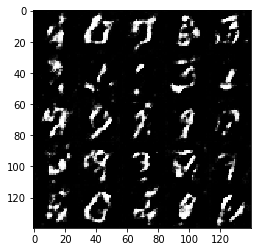

Epoch 1/2... Discriminator Loss: 0.9708... Generator Loss: 1.1566
Epoch 1/2... Discriminator Loss: 0.8399... Generator Loss: 1.4118
Epoch 1/2... Discriminator Loss: 0.8744... Generator Loss: 1.2195
Epoch 1/2... Discriminator Loss: 0.5984... Generator Loss: 2.2508
Epoch 1/2... Discriminator Loss: 0.8007... Generator Loss: 1.3489
Epoch 1/2... Discriminator Loss: 0.8736... Generator Loss: 1.6304
Epoch 1/2... Discriminator Loss: 0.9025... Generator Loss: 2.1836
Epoch 1/2... Discriminator Loss: 0.8732... Generator Loss: 2.0027
Epoch 1/2... Discriminator Loss: 0.5845... Generator Loss: 1.3158
Epoch 1/2... Discriminator Loss: 0.7784... Generator Loss: 1.4535


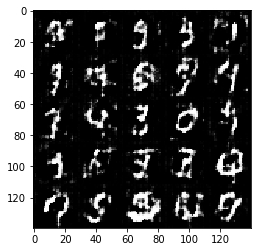

Epoch 1/2... Discriminator Loss: 0.7154... Generator Loss: 1.3366
Epoch 1/2... Discriminator Loss: 0.7956... Generator Loss: 1.7342
Epoch 1/2... Discriminator Loss: 1.3539... Generator Loss: 0.6637
Epoch 1/2... Discriminator Loss: 1.0501... Generator Loss: 1.3917
Epoch 1/2... Discriminator Loss: 1.1883... Generator Loss: 1.3733
Epoch 1/2... Discriminator Loss: 0.7302... Generator Loss: 1.4574
Epoch 1/2... Discriminator Loss: 0.8689... Generator Loss: 2.5540
Epoch 1/2... Discriminator Loss: 0.6360... Generator Loss: 1.4837
Epoch 1/2... Discriminator Loss: 1.3000... Generator Loss: 1.1488
Epoch 1/2... Discriminator Loss: 0.6961... Generator Loss: 1.7160


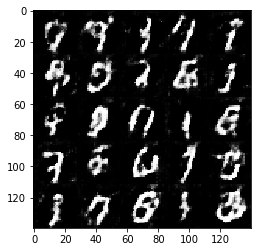

Epoch 1/2... Discriminator Loss: 1.3467... Generator Loss: 1.0882
Epoch 1/2... Discriminator Loss: 1.1127... Generator Loss: 0.7538
Epoch 1/2... Discriminator Loss: 0.8115... Generator Loss: 1.4842
Epoch 1/2... Discriminator Loss: 0.9996... Generator Loss: 1.5473
Epoch 1/2... Discriminator Loss: 0.5449... Generator Loss: 1.6657
Epoch 1/2... Discriminator Loss: 0.6801... Generator Loss: 3.2074
Epoch 1/2... Discriminator Loss: 1.3720... Generator Loss: 1.1046
Epoch 1/2... Discriminator Loss: 1.0997... Generator Loss: 1.4250
Epoch 1/2... Discriminator Loss: 0.9694... Generator Loss: 1.2492
Epoch 1/2... Discriminator Loss: 1.2151... Generator Loss: 1.2154


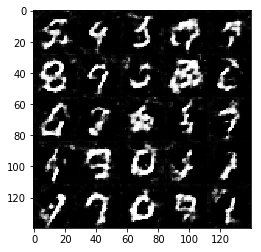

Epoch 1/2... Discriminator Loss: 0.8747... Generator Loss: 2.6569
Epoch 1/2... Discriminator Loss: 0.9198... Generator Loss: 1.4502
Epoch 1/2... Discriminator Loss: 1.3114... Generator Loss: 1.0431
Epoch 1/2... Discriminator Loss: 0.9135... Generator Loss: 2.2658
Epoch 1/2... Discriminator Loss: 1.0415... Generator Loss: 1.0441
Epoch 1/2... Discriminator Loss: 0.9801... Generator Loss: 1.7117
Epoch 1/2... Discriminator Loss: 0.7920... Generator Loss: 1.6652
Epoch 1/2... Discriminator Loss: 1.3602... Generator Loss: 0.6966
Epoch 1/2... Discriminator Loss: 0.8591... Generator Loss: 1.5285
Epoch 1/2... Discriminator Loss: 0.6999... Generator Loss: 1.6744


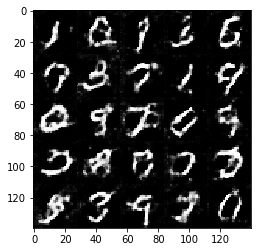

Epoch 1/2... Discriminator Loss: 0.6974... Generator Loss: 1.8504
Epoch 1/2... Discriminator Loss: 0.5067... Generator Loss: 1.8262
Epoch 1/2... Discriminator Loss: 0.9115... Generator Loss: 1.2401
Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.9347
Epoch 1/2... Discriminator Loss: 1.0474... Generator Loss: 1.1943
Epoch 1/2... Discriminator Loss: 0.7055... Generator Loss: 1.9638
Epoch 1/2... Discriminator Loss: 1.4382... Generator Loss: 1.0035
Epoch 1/2... Discriminator Loss: 0.6848... Generator Loss: 1.8180
Epoch 1/2... Discriminator Loss: 0.9177... Generator Loss: 1.4105
Epoch 1/2... Discriminator Loss: 1.1582... Generator Loss: 1.3929


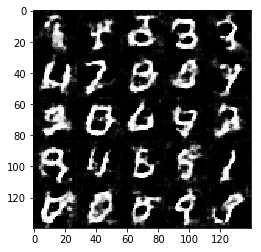

Epoch 1/2... Discriminator Loss: 1.1102... Generator Loss: 0.7796
Epoch 1/2... Discriminator Loss: 1.0561... Generator Loss: 1.4066
Epoch 1/2... Discriminator Loss: 0.9295... Generator Loss: 1.3992
Epoch 1/2... Discriminator Loss: 1.1229... Generator Loss: 0.7450
Epoch 1/2... Discriminator Loss: 1.1159... Generator Loss: 2.5156
Epoch 1/2... Discriminator Loss: 0.8330... Generator Loss: 1.1108
Epoch 1/2... Discriminator Loss: 0.7286... Generator Loss: 1.6464
Epoch 1/2... Discriminator Loss: 1.1705... Generator Loss: 1.6602
Epoch 1/2... Discriminator Loss: 0.7701... Generator Loss: 1.5082
Epoch 1/2... Discriminator Loss: 0.8389... Generator Loss: 1.3634


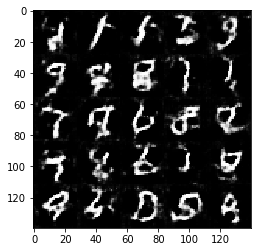

Epoch 1/2... Discriminator Loss: 0.9558... Generator Loss: 1.4091
Epoch 1/2... Discriminator Loss: 1.1828... Generator Loss: 1.0826
Epoch 1/2... Discriminator Loss: 1.2321... Generator Loss: 0.9457
Epoch 1/2... Discriminator Loss: 1.2417... Generator Loss: 0.8724
Epoch 1/2... Discriminator Loss: 1.3017... Generator Loss: 1.3253
Epoch 1/2... Discriminator Loss: 1.0067... Generator Loss: 1.3867
Epoch 1/2... Discriminator Loss: 1.2818... Generator Loss: 0.7841
Epoch 1/2... Discriminator Loss: 0.9584... Generator Loss: 1.9148
Epoch 1/2... Discriminator Loss: 0.7955... Generator Loss: 1.2493
Epoch 1/2... Discriminator Loss: 1.1100... Generator Loss: 1.4179


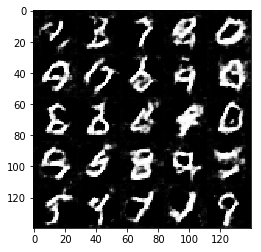

Epoch 1/2... Discriminator Loss: 1.0641... Generator Loss: 1.7740
Epoch 1/2... Discriminator Loss: 0.8287... Generator Loss: 1.1078
Epoch 1/2... Discriminator Loss: 0.8283... Generator Loss: 1.5762
Epoch 1/2... Discriminator Loss: 1.0328... Generator Loss: 1.3610
Epoch 1/2... Discriminator Loss: 0.7812... Generator Loss: 2.1937
Epoch 1/2... Discriminator Loss: 0.7630... Generator Loss: 1.0630
Epoch 1/2... Discriminator Loss: 0.9561... Generator Loss: 1.2054
Epoch 1/2... Discriminator Loss: 0.8951... Generator Loss: 1.5950
Epoch 1/2... Discriminator Loss: 1.4826... Generator Loss: 0.9063
Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 1.0805


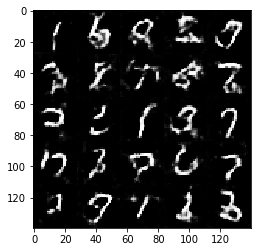

Epoch 1/2... Discriminator Loss: 0.6347... Generator Loss: 2.4201
Epoch 1/2... Discriminator Loss: 1.4101... Generator Loss: 0.9489
Epoch 1/2... Discriminator Loss: 1.0756... Generator Loss: 1.3202
Epoch 1/2... Discriminator Loss: 0.7128... Generator Loss: 1.5103
Epoch 1/2... Discriminator Loss: 0.9201... Generator Loss: 1.3262
Epoch 1/2... Discriminator Loss: 1.6669... Generator Loss: 0.5345
Epoch 1/2... Discriminator Loss: 0.8296... Generator Loss: 1.3520
Epoch 1/2... Discriminator Loss: 1.1454... Generator Loss: 1.9739
Epoch 1/2... Discriminator Loss: 0.7947... Generator Loss: 1.3357
Epoch 1/2... Discriminator Loss: 1.4142... Generator Loss: 0.7232


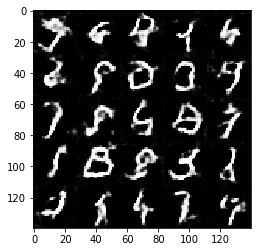

Epoch 1/2... Discriminator Loss: 0.7458... Generator Loss: 2.2440
Epoch 1/2... Discriminator Loss: 1.1647... Generator Loss: 1.2907
Epoch 1/2... Discriminator Loss: 1.1197... Generator Loss: 0.7657
Epoch 1/2... Discriminator Loss: 1.0894... Generator Loss: 1.4038
Epoch 1/2... Discriminator Loss: 1.2823... Generator Loss: 1.3900
Epoch 1/2... Discriminator Loss: 1.2417... Generator Loss: 0.7544
Epoch 1/2... Discriminator Loss: 1.3927... Generator Loss: 0.6171
Epoch 1/2... Discriminator Loss: 1.1891... Generator Loss: 1.5948
Epoch 1/2... Discriminator Loss: 1.7523... Generator Loss: 1.4228
Epoch 1/2... Discriminator Loss: 0.9996... Generator Loss: 1.9459


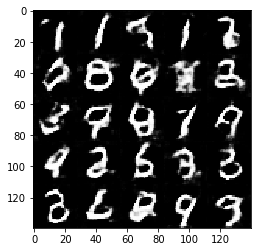

Epoch 1/2... Discriminator Loss: 1.1179... Generator Loss: 0.7200
Epoch 1/2... Discriminator Loss: 0.8961... Generator Loss: 1.6941
Epoch 1/2... Discriminator Loss: 1.0307... Generator Loss: 0.8059
Epoch 1/2... Discriminator Loss: 0.6787... Generator Loss: 1.5879
Epoch 1/2... Discriminator Loss: 1.2470... Generator Loss: 0.7647
Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 1.0460
Epoch 1/2... Discriminator Loss: 1.3230... Generator Loss: 1.3599
Epoch 1/2... Discriminator Loss: 0.9577... Generator Loss: 0.8203
Epoch 1/2... Discriminator Loss: 0.8004... Generator Loss: 1.5514
Epoch 1/2... Discriminator Loss: 1.7489... Generator Loss: 0.5750


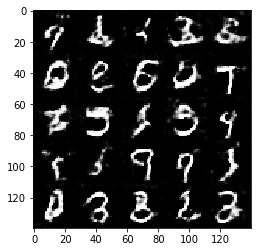

Epoch 1/2... Discriminator Loss: 1.1432... Generator Loss: 0.9265
Epoch 1/2... Discriminator Loss: 0.9337... Generator Loss: 0.6735
Epoch 1/2... Discriminator Loss: 1.2789... Generator Loss: 1.1990
Epoch 1/2... Discriminator Loss: 1.0336... Generator Loss: 0.7594
Epoch 1/2... Discriminator Loss: 0.6690... Generator Loss: 1.1630
Epoch 1/2... Discriminator Loss: 0.8110... Generator Loss: 1.7743
Epoch 1/2... Discriminator Loss: 1.4636... Generator Loss: 0.9959
Epoch 1/2... Discriminator Loss: 0.7814... Generator Loss: 1.4451
Epoch 1/2... Discriminator Loss: 0.8390... Generator Loss: 1.0917
Epoch 1/2... Discriminator Loss: 0.7219... Generator Loss: 1.4753


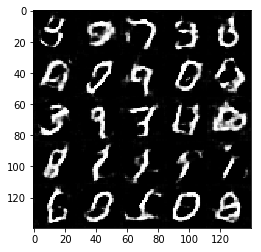

Epoch 1/2... Discriminator Loss: 0.9985... Generator Loss: 1.3698
Epoch 1/2... Discriminator Loss: 2.9662... Generator Loss: 0.1750
Epoch 1/2... Discriminator Loss: 1.4281... Generator Loss: 0.9535
Epoch 1/2... Discriminator Loss: 0.8954... Generator Loss: 1.2723
Epoch 1/2... Discriminator Loss: 0.7416... Generator Loss: 1.2922
Epoch 1/2... Discriminator Loss: 0.8340... Generator Loss: 1.4647
Epoch 1/2... Discriminator Loss: 0.8564... Generator Loss: 1.8577
Epoch 1/2... Discriminator Loss: 0.8420... Generator Loss: 1.2016
Epoch 1/2... Discriminator Loss: 0.6738... Generator Loss: 1.3562
Epoch 1/2... Discriminator Loss: 0.9222... Generator Loss: 1.5060


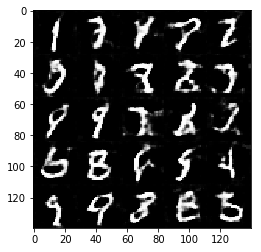

Epoch 1/2... Discriminator Loss: 1.0691... Generator Loss: 1.1341
Epoch 1/2... Discriminator Loss: 1.0267... Generator Loss: 1.1230
Epoch 1/2... Discriminator Loss: 1.2315... Generator Loss: 1.0219
Epoch 1/2... Discriminator Loss: 0.8558... Generator Loss: 1.4790
Epoch 1/2... Discriminator Loss: 1.0281... Generator Loss: 0.8883
Epoch 1/2... Discriminator Loss: 1.4239... Generator Loss: 0.4974
Epoch 1/2... Discriminator Loss: 0.8223... Generator Loss: 1.3960
Epoch 2/2... Discriminator Loss: 0.8078... Generator Loss: 1.7321
Epoch 2/2... Discriminator Loss: 1.0223... Generator Loss: 0.9713
Epoch 2/2... Discriminator Loss: 0.8464... Generator Loss: 1.3555


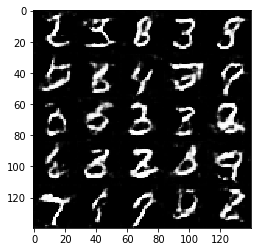

Epoch 2/2... Discriminator Loss: 1.4118... Generator Loss: 2.1536
Epoch 2/2... Discriminator Loss: 0.7509... Generator Loss: 1.6887
Epoch 2/2... Discriminator Loss: 0.9014... Generator Loss: 1.5263
Epoch 2/2... Discriminator Loss: 1.3326... Generator Loss: 1.5910
Epoch 2/2... Discriminator Loss: 0.7853... Generator Loss: 1.4101
Epoch 2/2... Discriminator Loss: 0.5631... Generator Loss: 1.2317
Epoch 2/2... Discriminator Loss: 1.0714... Generator Loss: 0.7969
Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 1.2011
Epoch 2/2... Discriminator Loss: 0.5072... Generator Loss: 2.6513
Epoch 2/2... Discriminator Loss: 0.7917... Generator Loss: 1.1267


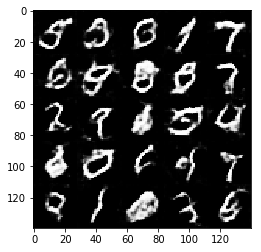

Epoch 2/2... Discriminator Loss: 0.9835... Generator Loss: 0.8676
Epoch 2/2... Discriminator Loss: 0.8289... Generator Loss: 1.1430
Epoch 2/2... Discriminator Loss: 0.5852... Generator Loss: 2.4968
Epoch 2/2... Discriminator Loss: 0.8015... Generator Loss: 1.1945
Epoch 2/2... Discriminator Loss: 1.1054... Generator Loss: 0.8850
Epoch 2/2... Discriminator Loss: 0.7556... Generator Loss: 1.9315
Epoch 2/2... Discriminator Loss: 1.0014... Generator Loss: 1.3762
Epoch 2/2... Discriminator Loss: 1.0539... Generator Loss: 1.2633
Epoch 2/2... Discriminator Loss: 0.9871... Generator Loss: 1.5534
Epoch 2/2... Discriminator Loss: 0.8408... Generator Loss: 2.4841


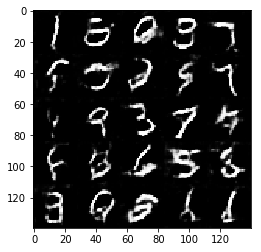

Epoch 2/2... Discriminator Loss: 1.3385... Generator Loss: 0.8300
Epoch 2/2... Discriminator Loss: 0.9644... Generator Loss: 2.2644
Epoch 2/2... Discriminator Loss: 0.5132... Generator Loss: 2.0557
Epoch 2/2... Discriminator Loss: 0.6965... Generator Loss: 1.9266
Epoch 2/2... Discriminator Loss: 0.8902... Generator Loss: 0.9149
Epoch 2/2... Discriminator Loss: 1.1053... Generator Loss: 1.1751
Epoch 2/2... Discriminator Loss: 1.3229... Generator Loss: 0.8363
Epoch 2/2... Discriminator Loss: 1.4274... Generator Loss: 1.3147
Epoch 2/2... Discriminator Loss: 0.4834... Generator Loss: 2.6138
Epoch 2/2... Discriminator Loss: 0.8944... Generator Loss: 1.1484


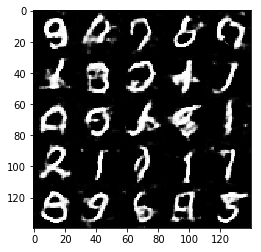

Epoch 2/2... Discriminator Loss: 0.8244... Generator Loss: 1.9072
Epoch 2/2... Discriminator Loss: 0.6143... Generator Loss: 2.1337
Epoch 2/2... Discriminator Loss: 1.1473... Generator Loss: 2.1221
Epoch 2/2... Discriminator Loss: 0.7948... Generator Loss: 1.6106
Epoch 2/2... Discriminator Loss: 0.9814... Generator Loss: 0.8974
Epoch 2/2... Discriminator Loss: 0.9517... Generator Loss: 2.2384
Epoch 2/2... Discriminator Loss: 0.8977... Generator Loss: 1.5055
Epoch 2/2... Discriminator Loss: 0.4594... Generator Loss: 1.8368
Epoch 2/2... Discriminator Loss: 1.4053... Generator Loss: 1.3191
Epoch 2/2... Discriminator Loss: 0.4611... Generator Loss: 2.3708


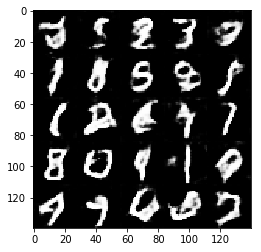

Epoch 2/2... Discriminator Loss: 1.2135... Generator Loss: 1.3593
Epoch 2/2... Discriminator Loss: 0.8063... Generator Loss: 1.1595
Epoch 2/2... Discriminator Loss: 0.6714... Generator Loss: 1.7902
Epoch 2/2... Discriminator Loss: 1.1242... Generator Loss: 1.2162
Epoch 2/2... Discriminator Loss: 0.8955... Generator Loss: 2.6480
Epoch 2/2... Discriminator Loss: 0.7507... Generator Loss: 1.0070
Epoch 2/2... Discriminator Loss: 0.8734... Generator Loss: 1.3906
Epoch 2/2... Discriminator Loss: 0.9748... Generator Loss: 0.8215
Epoch 2/2... Discriminator Loss: 0.8852... Generator Loss: 2.3548
Epoch 2/2... Discriminator Loss: 0.9805... Generator Loss: 2.1063


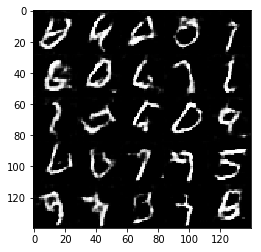

Epoch 2/2... Discriminator Loss: 0.8150... Generator Loss: 1.0976
Epoch 2/2... Discriminator Loss: 0.6740... Generator Loss: 1.3019
Epoch 2/2... Discriminator Loss: 0.8537... Generator Loss: 2.0129
Epoch 2/2... Discriminator Loss: 0.7970... Generator Loss: 2.2565
Epoch 2/2... Discriminator Loss: 0.6377... Generator Loss: 1.0534
Epoch 2/2... Discriminator Loss: 0.9081... Generator Loss: 1.1988
Epoch 2/2... Discriminator Loss: 1.2696... Generator Loss: 2.0371
Epoch 2/2... Discriminator Loss: 0.9489... Generator Loss: 1.2509
Epoch 2/2... Discriminator Loss: 0.6459... Generator Loss: 1.6550
Epoch 2/2... Discriminator Loss: 0.9091... Generator Loss: 1.0450


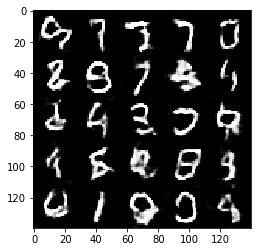

Epoch 2/2... Discriminator Loss: 0.8713... Generator Loss: 1.9561
Epoch 2/2... Discriminator Loss: 0.6713... Generator Loss: 1.7470
Epoch 2/2... Discriminator Loss: 0.4398... Generator Loss: 2.3223
Epoch 2/2... Discriminator Loss: 1.0424... Generator Loss: 0.7995
Epoch 2/2... Discriminator Loss: 1.0791... Generator Loss: 1.4324
Epoch 2/2... Discriminator Loss: 1.0425... Generator Loss: 0.9267
Epoch 2/2... Discriminator Loss: 0.8538... Generator Loss: 1.4554
Epoch 2/2... Discriminator Loss: 0.7789... Generator Loss: 0.7897
Epoch 2/2... Discriminator Loss: 0.7827... Generator Loss: 1.5853
Epoch 2/2... Discriminator Loss: 0.8559... Generator Loss: 1.3684


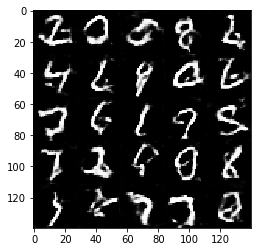

Epoch 2/2... Discriminator Loss: 0.6946... Generator Loss: 1.6390
Epoch 2/2... Discriminator Loss: 0.6321... Generator Loss: 2.5851
Epoch 2/2... Discriminator Loss: 0.8552... Generator Loss: 2.7960
Epoch 2/2... Discriminator Loss: 1.6810... Generator Loss: 0.4910
Epoch 2/2... Discriminator Loss: 0.6391... Generator Loss: 1.5449
Epoch 2/2... Discriminator Loss: 0.9307... Generator Loss: 2.6800
Epoch 2/2... Discriminator Loss: 0.9430... Generator Loss: 1.7549
Epoch 2/2... Discriminator Loss: 0.6273... Generator Loss: 1.4148
Epoch 2/2... Discriminator Loss: 0.5160... Generator Loss: 1.8867
Epoch 2/2... Discriminator Loss: 1.3489... Generator Loss: 2.7011


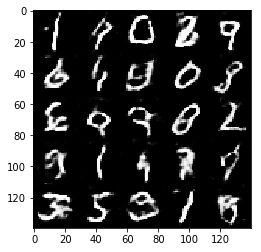

Epoch 2/2... Discriminator Loss: 0.2558... Generator Loss: 3.2666
Epoch 2/2... Discriminator Loss: 1.0361... Generator Loss: 1.1353
Epoch 2/2... Discriminator Loss: 0.9207... Generator Loss: 1.1200
Epoch 2/2... Discriminator Loss: 0.6849... Generator Loss: 1.5816
Epoch 2/2... Discriminator Loss: 0.7283... Generator Loss: 1.0983
Epoch 2/2... Discriminator Loss: 0.6035... Generator Loss: 2.6405
Epoch 2/2... Discriminator Loss: 1.0252... Generator Loss: 1.9286
Epoch 2/2... Discriminator Loss: 0.3559... Generator Loss: 2.8182
Epoch 2/2... Discriminator Loss: 1.1890... Generator Loss: 0.8381
Epoch 2/2... Discriminator Loss: 0.9227... Generator Loss: 2.7010


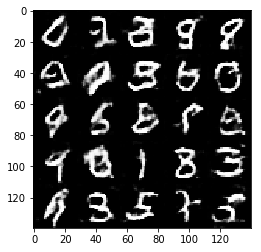

Epoch 2/2... Discriminator Loss: 0.7762... Generator Loss: 1.8356
Epoch 2/2... Discriminator Loss: 0.8265... Generator Loss: 1.3174
Epoch 2/2... Discriminator Loss: 0.8049... Generator Loss: 1.2405
Epoch 2/2... Discriminator Loss: 0.6886... Generator Loss: 2.1107
Epoch 2/2... Discriminator Loss: 0.7562... Generator Loss: 1.6032
Epoch 2/2... Discriminator Loss: 0.8100... Generator Loss: 1.7201
Epoch 2/2... Discriminator Loss: 0.7551... Generator Loss: 1.6047
Epoch 2/2... Discriminator Loss: 0.5221... Generator Loss: 2.1667
Epoch 2/2... Discriminator Loss: 0.5908... Generator Loss: 2.6010
Epoch 2/2... Discriminator Loss: 0.9140... Generator Loss: 1.4093


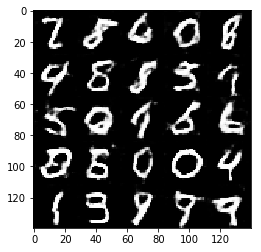

Epoch 2/2... Discriminator Loss: 0.6915... Generator Loss: 2.0246
Epoch 2/2... Discriminator Loss: 0.6576... Generator Loss: 2.0547
Epoch 2/2... Discriminator Loss: 0.6058... Generator Loss: 2.1719
Epoch 2/2... Discriminator Loss: 0.8190... Generator Loss: 2.7504
Epoch 2/2... Discriminator Loss: 0.9721... Generator Loss: 1.3397
Epoch 2/2... Discriminator Loss: 0.6182... Generator Loss: 1.6057
Epoch 2/2... Discriminator Loss: 0.5944... Generator Loss: 2.2701
Epoch 2/2... Discriminator Loss: 1.0203... Generator Loss: 2.0973
Epoch 2/2... Discriminator Loss: 0.9509... Generator Loss: 0.9972
Epoch 2/2... Discriminator Loss: 0.4737... Generator Loss: 1.9740


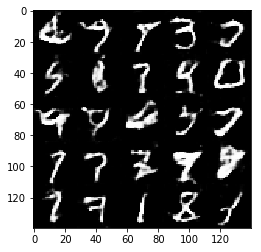

Epoch 2/2... Discriminator Loss: 0.9326... Generator Loss: 1.6383
Epoch 2/2... Discriminator Loss: 0.4375... Generator Loss: 2.4952
Epoch 2/2... Discriminator Loss: 0.5914... Generator Loss: 2.0639
Epoch 2/2... Discriminator Loss: 0.6581... Generator Loss: 1.6135
Epoch 2/2... Discriminator Loss: 0.3069... Generator Loss: 1.7996
Epoch 2/2... Discriminator Loss: 0.5121... Generator Loss: 2.5752
Epoch 2/2... Discriminator Loss: 1.0171... Generator Loss: 1.3142
Epoch 2/2... Discriminator Loss: 0.6332... Generator Loss: 1.9386
Epoch 2/2... Discriminator Loss: 1.7886... Generator Loss: 0.4719
Epoch 2/2... Discriminator Loss: 0.5040... Generator Loss: 1.9051


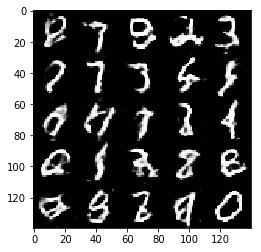

Epoch 2/2... Discriminator Loss: 0.7002... Generator Loss: 3.2909
Epoch 2/2... Discriminator Loss: 0.7378... Generator Loss: 1.7248
Epoch 2/2... Discriminator Loss: 0.8465... Generator Loss: 2.8596
Epoch 2/2... Discriminator Loss: 0.4124... Generator Loss: 1.1889
Epoch 2/2... Discriminator Loss: 0.8713... Generator Loss: 1.6959
Epoch 2/2... Discriminator Loss: 0.5920... Generator Loss: 2.0333
Epoch 2/2... Discriminator Loss: 0.4220... Generator Loss: 1.5539
Epoch 2/2... Discriminator Loss: 0.3904... Generator Loss: 1.4805
Epoch 2/2... Discriminator Loss: 0.6592... Generator Loss: 1.8907
Epoch 2/2... Discriminator Loss: 0.4806... Generator Loss: 1.8032


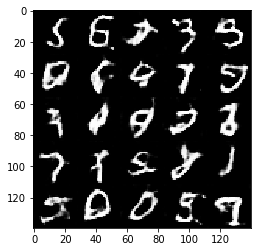

Epoch 2/2... Discriminator Loss: 0.9221... Generator Loss: 1.3136
Epoch 2/2... Discriminator Loss: 0.7412... Generator Loss: 0.9326
Epoch 2/2... Discriminator Loss: 0.7717... Generator Loss: 0.9168
Epoch 2/2... Discriminator Loss: 0.8106... Generator Loss: 1.0369
Epoch 2/2... Discriminator Loss: 0.4576... Generator Loss: 2.2196
Epoch 2/2... Discriminator Loss: 0.6213... Generator Loss: 1.2934
Epoch 2/2... Discriminator Loss: 0.6490... Generator Loss: 1.7906
Epoch 2/2... Discriminator Loss: 0.4271... Generator Loss: 1.6384
Epoch 2/2... Discriminator Loss: 1.0562... Generator Loss: 1.2225
Epoch 2/2... Discriminator Loss: 0.3943... Generator Loss: 1.7179


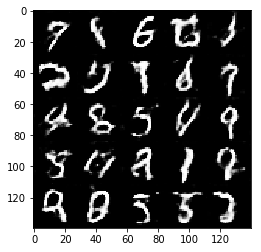

Epoch 2/2... Discriminator Loss: 0.6633... Generator Loss: 1.8205
Epoch 2/2... Discriminator Loss: 0.6627... Generator Loss: 3.2200
Epoch 2/2... Discriminator Loss: 0.3586... Generator Loss: 2.3332
Epoch 2/2... Discriminator Loss: 0.4776... Generator Loss: 2.2954
Epoch 2/2... Discriminator Loss: 1.1476... Generator Loss: 4.0713
Epoch 2/2... Discriminator Loss: 0.2570... Generator Loss: 2.3492
Epoch 2/2... Discriminator Loss: 0.9586... Generator Loss: 0.8840
Epoch 2/2... Discriminator Loss: 0.6134... Generator Loss: 1.9319
Epoch 2/2... Discriminator Loss: 0.3475... Generator Loss: 2.2859
Epoch 2/2... Discriminator Loss: 0.7621... Generator Loss: 2.0124


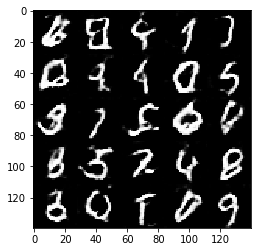

Epoch 2/2... Discriminator Loss: 0.3981... Generator Loss: 2.7839
Epoch 2/2... Discriminator Loss: 0.8510... Generator Loss: 3.3236
Epoch 2/2... Discriminator Loss: 0.7514... Generator Loss: 1.4303
Epoch 2/2... Discriminator Loss: 0.5771... Generator Loss: 2.2712
Epoch 2/2... Discriminator Loss: 0.6637... Generator Loss: 2.0320
Epoch 2/2... Discriminator Loss: 0.3744... Generator Loss: 2.7070
Epoch 2/2... Discriminator Loss: 0.5220... Generator Loss: 2.8754
Epoch 2/2... Discriminator Loss: 0.4850... Generator Loss: 3.5642
Epoch 2/2... Discriminator Loss: 0.6230... Generator Loss: 1.5054
Epoch 2/2... Discriminator Loss: 0.5866... Generator Loss: 2.1196


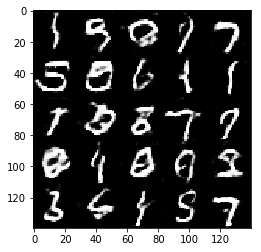

Epoch 2/2... Discriminator Loss: 0.6244... Generator Loss: 2.7350
Epoch 2/2... Discriminator Loss: 0.4147... Generator Loss: 3.0994
Epoch 2/2... Discriminator Loss: 0.3621... Generator Loss: 2.9824
Epoch 2/2... Discriminator Loss: 0.7473... Generator Loss: 1.2741
Epoch 2/2... Discriminator Loss: 0.4397... Generator Loss: 2.6409
Epoch 2/2... Discriminator Loss: 0.4986... Generator Loss: 3.8222
Epoch 2/2... Discriminator Loss: 0.3899... Generator Loss: 2.8017
Epoch 2/2... Discriminator Loss: 0.4283... Generator Loss: 2.1608
Epoch 2/2... Discriminator Loss: 1.8747... Generator Loss: 0.4556
Epoch 2/2... Discriminator Loss: 0.8421... Generator Loss: 1.6566


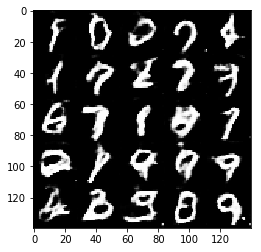

Epoch 2/2... Discriminator Loss: 0.2139... Generator Loss: 2.8955
Epoch 2/2... Discriminator Loss: 0.8100... Generator Loss: 1.7380
Epoch 2/2... Discriminator Loss: 0.3791... Generator Loss: 1.7384
Epoch 2/2... Discriminator Loss: 0.9789... Generator Loss: 0.9374
Epoch 2/2... Discriminator Loss: 0.1070... Generator Loss: 3.9119
Epoch 2/2... Discriminator Loss: 0.6931... Generator Loss: 1.8124
Epoch 2/2... Discriminator Loss: 0.4945... Generator Loss: 2.0876
Epoch 2/2... Discriminator Loss: 0.9303... Generator Loss: 0.6971
Epoch 2/2... Discriminator Loss: 1.0349... Generator Loss: 1.2661
Epoch 2/2... Discriminator Loss: 0.6560... Generator Loss: 1.4528


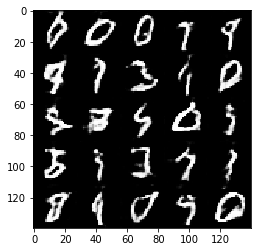

Epoch 2/2... Discriminator Loss: 0.5349... Generator Loss: 1.4452
Epoch 2/2... Discriminator Loss: 0.5092... Generator Loss: 1.9900
Epoch 2/2... Discriminator Loss: 0.3156... Generator Loss: 2.1353
Epoch 2/2... Discriminator Loss: 0.2624... Generator Loss: 2.8749
Epoch 2/2... Discriminator Loss: 0.7544... Generator Loss: 1.2291


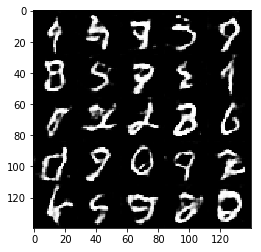

In [128]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    losses = train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4125... Generator Loss: 13.3088
Epoch 1/1... Discriminator Loss: 0.3579... Generator Loss: 7.0410
Epoch 1/1... Discriminator Loss: 0.7815... Generator Loss: 1.6811
Epoch 1/1... Discriminator Loss: 0.7743... Generator Loss: 2.4593
Epoch 1/1... Discriminator Loss: 0.5799... Generator Loss: 2.5426
Epoch 1/1... Discriminator Loss: 2.5056... Generator Loss: 0.1832
Epoch 1/1... Discriminator Loss: 1.4755... Generator Loss: 0.4945
Epoch 1/1... Discriminator Loss: 2.3305... Generator Loss: 7.7367
Epoch 1/1... Discriminator Loss: 1.0078... Generator Loss: 0.8711
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 6.3364


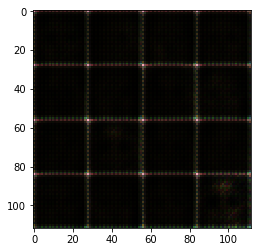

Epoch 1/1... Discriminator Loss: 0.9042... Generator Loss: 1.0297
Epoch 1/1... Discriminator Loss: 0.5184... Generator Loss: 2.2677
Epoch 1/1... Discriminator Loss: 0.7958... Generator Loss: 5.1063
Epoch 1/1... Discriminator Loss: 1.5289... Generator Loss: 0.4817
Epoch 1/1... Discriminator Loss: 1.1776... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 0.5896... Generator Loss: 1.7927
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 3.0486
Epoch 1/1... Discriminator Loss: 0.4414... Generator Loss: 3.6407
Epoch 1/1... Discriminator Loss: 1.5403... Generator Loss: 2.3512
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 1.5740


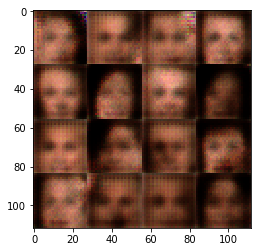

Epoch 1/1... Discriminator Loss: 1.6731... Generator Loss: 0.3451
Epoch 1/1... Discriminator Loss: 0.9540... Generator Loss: 1.3387
Epoch 1/1... Discriminator Loss: 3.0469... Generator Loss: 4.5675
Epoch 1/1... Discriminator Loss: 0.9201... Generator Loss: 1.0837
Epoch 1/1... Discriminator Loss: 0.6893... Generator Loss: 1.5689
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 0.7162
Epoch 1/1... Discriminator Loss: 1.1986... Generator Loss: 2.9550
Epoch 1/1... Discriminator Loss: 0.9980... Generator Loss: 0.9113
Epoch 1/1... Discriminator Loss: 1.0032... Generator Loss: 3.0677
Epoch 1/1... Discriminator Loss: 1.2584... Generator Loss: 2.4436


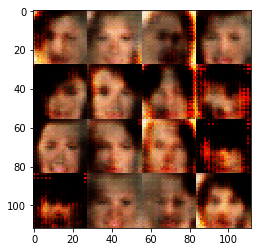

Epoch 1/1... Discriminator Loss: 1.3596... Generator Loss: 2.8810
Epoch 1/1... Discriminator Loss: 1.5613... Generator Loss: 0.4414
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.6224
Epoch 1/1... Discriminator Loss: 1.6180... Generator Loss: 0.8684
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.8153
Epoch 1/1... Discriminator Loss: 1.9475... Generator Loss: 3.1417
Epoch 1/1... Discriminator Loss: 0.9076... Generator Loss: 1.0274
Epoch 1/1... Discriminator Loss: 1.5903... Generator Loss: 0.4180
Epoch 1/1... Discriminator Loss: 1.1711... Generator Loss: 0.8650
Epoch 1/1... Discriminator Loss: 1.1164... Generator Loss: 0.9990


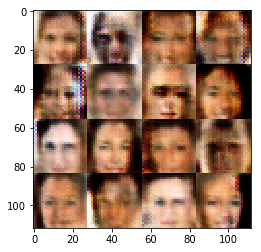

Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 1.6269
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 0.7203
Epoch 1/1... Discriminator Loss: 0.6871... Generator Loss: 1.3774
Epoch 1/1... Discriminator Loss: 0.8769... Generator Loss: 1.9487
Epoch 1/1... Discriminator Loss: 1.0899... Generator Loss: 1.4449
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.4646
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.6856
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 1.6119
Epoch 1/1... Discriminator Loss: 1.1179... Generator Loss: 0.7578
Epoch 1/1... Discriminator Loss: 3.2299... Generator Loss: 3.4117


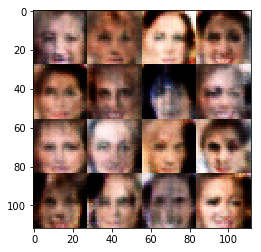

Epoch 1/1... Discriminator Loss: 0.8711... Generator Loss: 1.5496
Epoch 1/1... Discriminator Loss: 0.9292... Generator Loss: 1.2630
Epoch 1/1... Discriminator Loss: 1.6600... Generator Loss: 0.4741
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.5365
Epoch 1/1... Discriminator Loss: 1.3568... Generator Loss: 1.5844
Epoch 1/1... Discriminator Loss: 1.7823... Generator Loss: 0.3023
Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 2.0871
Epoch 1/1... Discriminator Loss: 1.1342... Generator Loss: 1.4054
Epoch 1/1... Discriminator Loss: 1.5429... Generator Loss: 0.3993
Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.5230


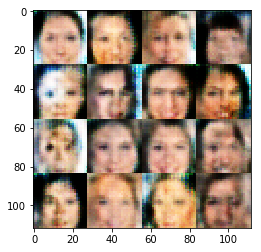

Epoch 1/1... Discriminator Loss: 1.8221... Generator Loss: 0.2985
Epoch 1/1... Discriminator Loss: 0.9541... Generator Loss: 1.2612
Epoch 1/1... Discriminator Loss: 0.9514... Generator Loss: 1.6937
Epoch 1/1... Discriminator Loss: 0.7359... Generator Loss: 1.5004
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 1.2563
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 1.0285
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 0.9316
Epoch 1/1... Discriminator Loss: 1.5314... Generator Loss: 0.5046
Epoch 1/1... Discriminator Loss: 0.9669... Generator Loss: 1.4148
Epoch 1/1... Discriminator Loss: 1.5265... Generator Loss: 0.3881


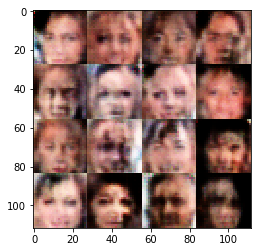

Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.4950
Epoch 1/1... Discriminator Loss: 1.7521... Generator Loss: 2.0729
Epoch 1/1... Discriminator Loss: 0.9948... Generator Loss: 0.9214
Epoch 1/1... Discriminator Loss: 1.1934... Generator Loss: 0.8058
Epoch 1/1... Discriminator Loss: 1.1296... Generator Loss: 0.9548
Epoch 1/1... Discriminator Loss: 0.8779... Generator Loss: 1.7884
Epoch 1/1... Discriminator Loss: 0.6472... Generator Loss: 2.1478
Epoch 1/1... Discriminator Loss: 0.8212... Generator Loss: 1.4250
Epoch 1/1... Discriminator Loss: 0.9253... Generator Loss: 1.1627
Epoch 1/1... Discriminator Loss: 1.2130... Generator Loss: 0.9049


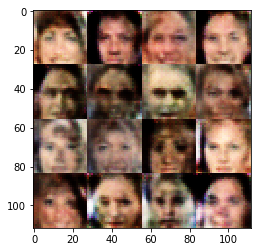

Epoch 1/1... Discriminator Loss: 1.0722... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 1.4508... Generator Loss: 0.7612
Epoch 1/1... Discriminator Loss: 1.5489... Generator Loss: 0.3947
Epoch 1/1... Discriminator Loss: 1.0571... Generator Loss: 1.0974
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.5918
Epoch 1/1... Discriminator Loss: 1.2790... Generator Loss: 0.7961
Epoch 1/1... Discriminator Loss: 0.7382... Generator Loss: 1.4720
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 1.0530
Epoch 1/1... Discriminator Loss: 1.0354... Generator Loss: 1.1109
Epoch 1/1... Discriminator Loss: 1.1581... Generator Loss: 0.9381


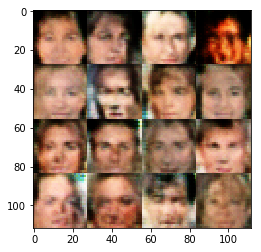

Epoch 1/1... Discriminator Loss: 1.1137... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.6618... Generator Loss: 0.3718
Epoch 1/1... Discriminator Loss: 1.1950... Generator Loss: 0.8989
Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 0.8318
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.5280
Epoch 1/1... Discriminator Loss: 1.0787... Generator Loss: 0.7579
Epoch 1/1... Discriminator Loss: 1.0657... Generator Loss: 1.1746
Epoch 1/1... Discriminator Loss: 1.4191... Generator Loss: 0.6113
Epoch 1/1... Discriminator Loss: 1.0842... Generator Loss: 0.8790


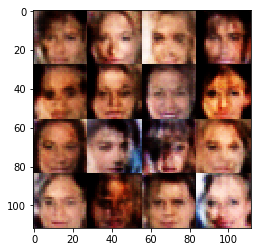

Epoch 1/1... Discriminator Loss: 1.1387... Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.1364... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 2.6889
Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.5538
Epoch 1/1... Discriminator Loss: 1.6525... Generator Loss: 0.4128
Epoch 1/1... Discriminator Loss: 1.0085... Generator Loss: 1.1797
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 1.0709
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 0.9392... Generator Loss: 0.9969


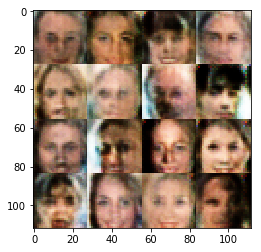

Epoch 1/1... Discriminator Loss: 1.5457... Generator Loss: 0.5464
Epoch 1/1... Discriminator Loss: 1.2544... Generator Loss: 0.7796
Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 1.0183
Epoch 1/1... Discriminator Loss: 0.8354... Generator Loss: 2.9012
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.6217
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.9409
Epoch 1/1... Discriminator Loss: 1.4389... Generator Loss: 0.6791
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 1.2475
Epoch 1/1... Discriminator Loss: 1.5045... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.6404


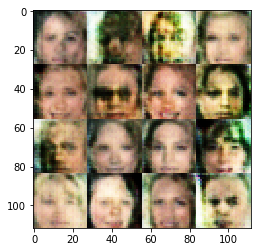

Epoch 1/1... Discriminator Loss: 1.6198... Generator Loss: 0.5898
Epoch 1/1... Discriminator Loss: 1.1107... Generator Loss: 1.1160
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 1.0896
Epoch 1/1... Discriminator Loss: 1.3481... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.5099
Epoch 1/1... Discriminator Loss: 1.6325... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 0.9793... Generator Loss: 1.0782
Epoch 1/1... Discriminator Loss: 1.5948... Generator Loss: 0.7155
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 0.7350
Epoch 1/1... Discriminator Loss: 0.7118... Generator Loss: 1.7626


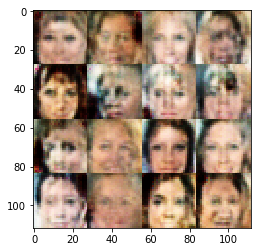

Epoch 1/1... Discriminator Loss: 0.6639... Generator Loss: 1.9546
Epoch 1/1... Discriminator Loss: 1.2544... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.6225... Generator Loss: 0.4102
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.5960
Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.2099... Generator Loss: 0.7972
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.5577
Epoch 1/1... Discriminator Loss: 1.8526... Generator Loss: 1.1168
Epoch 1/1... Discriminator Loss: 1.5231... Generator Loss: 0.9824
Epoch 1/1... Discriminator Loss: 1.0057... Generator Loss: 2.2797


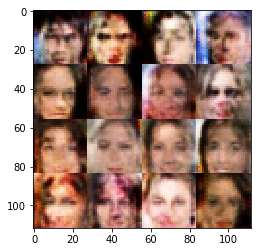

Epoch 1/1... Discriminator Loss: 1.4699... Generator Loss: 0.5378
Epoch 1/1... Discriminator Loss: 1.5671... Generator Loss: 0.4263
Epoch 1/1... Discriminator Loss: 1.2368... Generator Loss: 0.6002
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 1.9446
Epoch 1/1... Discriminator Loss: 1.4741... Generator Loss: 0.5970
Epoch 1/1... Discriminator Loss: 1.4158... Generator Loss: 0.9826
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.0927... Generator Loss: 0.9503
Epoch 1/1... Discriminator Loss: 1.2220... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.5128... Generator Loss: 0.4643


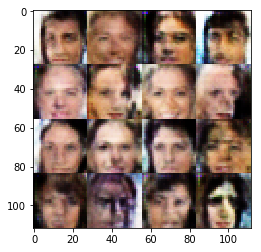

Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 0.5760
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.4708
Epoch 1/1... Discriminator Loss: 1.6354... Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 1.3825
Epoch 1/1... Discriminator Loss: 1.1219... Generator Loss: 0.7830
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.1274... Generator Loss: 1.2516
Epoch 1/1... Discriminator Loss: 1.1223... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.4869... Generator Loss: 0.4134
Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 0.4289


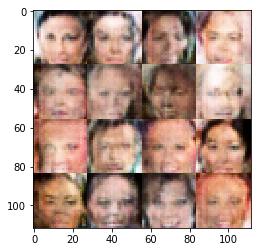

Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.4718... Generator Loss: 0.4200
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.7804
Epoch 1/1... Discriminator Loss: 1.5367... Generator Loss: 0.4642
Epoch 1/1... Discriminator Loss: 0.9473... Generator Loss: 1.6806
Epoch 1/1... Discriminator Loss: 1.5488... Generator Loss: 0.5922
Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.8339... Generator Loss: 0.3664
Epoch 1/1... Discriminator Loss: 1.4551... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.5186... Generator Loss: 0.9873


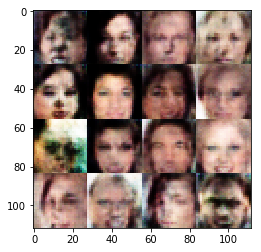

Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 1.0597
Epoch 1/1... Discriminator Loss: 1.2199... Generator Loss: 1.7946
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.5697
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.1659... Generator Loss: 1.0694
Epoch 1/1... Discriminator Loss: 1.2330... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.5996
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.5747
Epoch 1/1... Discriminator Loss: 1.5231... Generator Loss: 0.4391


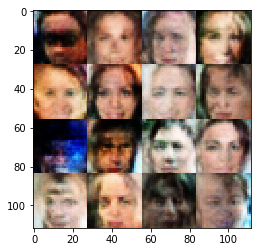

Epoch 1/1... Discriminator Loss: 0.9060... Generator Loss: 1.2820
Epoch 1/1... Discriminator Loss: 1.4411... Generator Loss: 0.5218
Epoch 1/1... Discriminator Loss: 1.4702... Generator Loss: 0.8568
Epoch 1/1... Discriminator Loss: 1.2641... Generator Loss: 1.3119
Epoch 1/1... Discriminator Loss: 1.1481... Generator Loss: 0.8842
Epoch 1/1... Discriminator Loss: 1.1436... Generator Loss: 1.1672
Epoch 1/1... Discriminator Loss: 1.3264... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.5365
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.4621
Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.7024


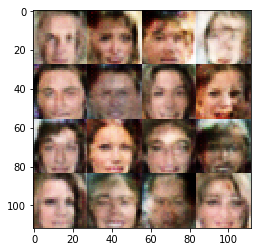

Epoch 1/1... Discriminator Loss: 2.0570... Generator Loss: 0.2279
Epoch 1/1... Discriminator Loss: 1.0418... Generator Loss: 0.9305
Epoch 1/1... Discriminator Loss: 1.5560... Generator Loss: 0.4043
Epoch 1/1... Discriminator Loss: 1.4274... Generator Loss: 0.4737
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.9474
Epoch 1/1... Discriminator Loss: 1.5036... Generator Loss: 0.7022
Epoch 1/1... Discriminator Loss: 1.5038... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 0.8973... Generator Loss: 1.6173
Epoch 1/1... Discriminator Loss: 1.2779... Generator Loss: 1.1996
Epoch 1/1... Discriminator Loss: 1.0709... Generator Loss: 1.1964


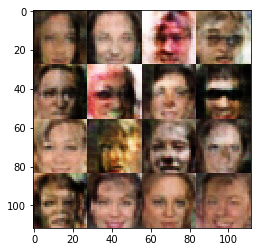

Epoch 1/1... Discriminator Loss: 1.4818... Generator Loss: 0.6344
Epoch 1/1... Discriminator Loss: 1.4814... Generator Loss: 0.5751
Epoch 1/1... Discriminator Loss: 1.3447... Generator Loss: 0.6963
Epoch 1/1... Discriminator Loss: 1.4317... Generator Loss: 0.6205
Epoch 1/1... Discriminator Loss: 1.4439... Generator Loss: 0.5057
Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 0.7419
Epoch 1/1... Discriminator Loss: 1.3170... Generator Loss: 0.6027
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 0.7245
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 1.3234... Generator Loss: 0.5950


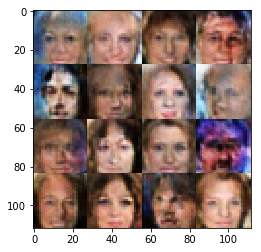

Epoch 1/1... Discriminator Loss: 0.9739... Generator Loss: 1.1312
Epoch 1/1... Discriminator Loss: 1.4865... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.5155... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 0.5289
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.5813
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 0.9167
Epoch 1/1... Discriminator Loss: 1.1574... Generator Loss: 1.0130
Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 1.4032
Epoch 1/1... Discriminator Loss: 1.5350... Generator Loss: 0.6381


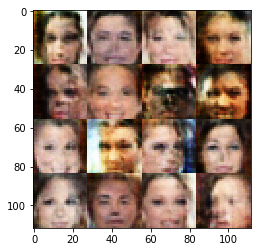

Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.4275... Generator Loss: 0.8986
Epoch 1/1... Discriminator Loss: 1.5639... Generator Loss: 0.4524
Epoch 1/1... Discriminator Loss: 1.4788... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.9124
Epoch 1/1... Discriminator Loss: 1.3487... Generator Loss: 0.5625
Epoch 1/1... Discriminator Loss: 1.5526... Generator Loss: 0.4570
Epoch 1/1... Discriminator Loss: 1.1778... Generator Loss: 0.7126
Epoch 1/1... Discriminator Loss: 1.0782... Generator Loss: 0.8080
Epoch 1/1... Discriminator Loss: 1.4822... Generator Loss: 0.4308


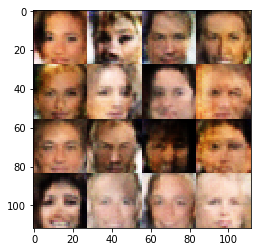

Epoch 1/1... Discriminator Loss: 1.7688... Generator Loss: 1.3331
Epoch 1/1... Discriminator Loss: 1.6220... Generator Loss: 0.4553
Epoch 1/1... Discriminator Loss: 1.7362... Generator Loss: 0.3452
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 1.0204
Epoch 1/1... Discriminator Loss: 1.5374... Generator Loss: 0.5115
Epoch 1/1... Discriminator Loss: 1.5564... Generator Loss: 0.4180
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.9333
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 1.0291
Epoch 1/1... Discriminator Loss: 1.2537... Generator Loss: 1.1976
Epoch 1/1... Discriminator Loss: 1.4512... Generator Loss: 0.5729


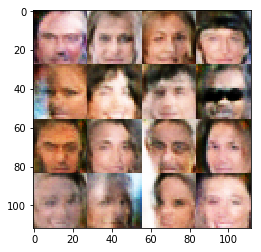

Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 0.8367... Generator Loss: 1.1914
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.5273
Epoch 1/1... Discriminator Loss: 1.5252... Generator Loss: 0.5112
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 1.4397... Generator Loss: 0.5045
Epoch 1/1... Discriminator Loss: 1.1564... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 1.3416... Generator Loss: 0.8283
Epoch 1/1... Discriminator Loss: 1.2280... Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.4485... Generator Loss: 0.7427


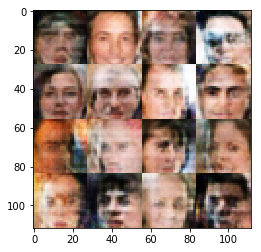

Epoch 1/1... Discriminator Loss: 1.4612... Generator Loss: 0.6171
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 1.1795... Generator Loss: 0.8679
Epoch 1/1... Discriminator Loss: 1.3546... Generator Loss: 1.0114
Epoch 1/1... Discriminator Loss: 1.4312... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.5790... Generator Loss: 1.3235
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.2598... Generator Loss: 0.7203
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.5512
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 0.8725


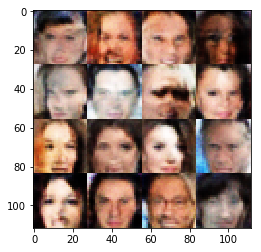

Epoch 1/1... Discriminator Loss: 1.0556... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 1.3248... Generator Loss: 0.5477
Epoch 1/1... Discriminator Loss: 1.2811... Generator Loss: 0.8729
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 0.6886
Epoch 1/1... Discriminator Loss: 1.4496... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.3053... Generator Loss: 0.6339
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 1.1862
Epoch 1/1... Discriminator Loss: 1.5829... Generator Loss: 0.4986
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.5774
Epoch 1/1... Discriminator Loss: 1.5171... Generator Loss: 0.5606


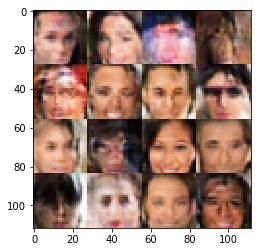

Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.6282
Epoch 1/1... Discriminator Loss: 1.2117... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.5361... Generator Loss: 0.4791
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.8036
Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 0.7339
Epoch 1/1... Discriminator Loss: 1.3496... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 0.4715
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.6074


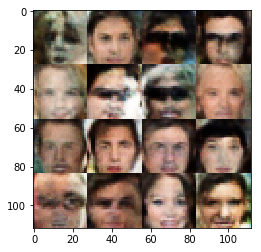

Epoch 1/1... Discriminator Loss: 1.5259... Generator Loss: 0.4678
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.7651
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 0.5633
Epoch 1/1... Discriminator Loss: 1.0561... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 0.8495
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.5193... Generator Loss: 0.4482
Epoch 1/1... Discriminator Loss: 1.4853... Generator Loss: 0.6601
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.7271


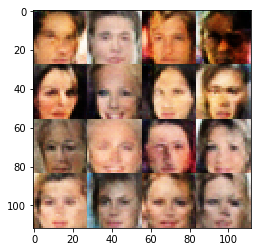

Epoch 1/1... Discriminator Loss: 1.4853... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.2585... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 1.6443... Generator Loss: 0.3809
Epoch 1/1... Discriminator Loss: 1.2386... Generator Loss: 0.6969
Epoch 1/1... Discriminator Loss: 1.1025... Generator Loss: 1.0895
Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.9245
Epoch 1/1... Discriminator Loss: 1.2856... Generator Loss: 0.6472
Epoch 1/1... Discriminator Loss: 1.4168... Generator Loss: 0.5132
Epoch 1/1... Discriminator Loss: 1.4906... Generator Loss: 0.6512


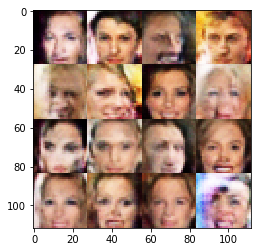

Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.9367
Epoch 1/1... Discriminator Loss: 1.6786... Generator Loss: 0.3765
Epoch 1/1... Discriminator Loss: 1.2746... Generator Loss: 0.6174
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.5969
Epoch 1/1... Discriminator Loss: 1.1943... Generator Loss: 0.8459
Epoch 1/1... Discriminator Loss: 1.1076... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.5182
Epoch 1/1... Discriminator Loss: 1.1460... Generator Loss: 0.9437
Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.5586
Epoch 1/1... Discriminator Loss: 1.8213... Generator Loss: 0.4037


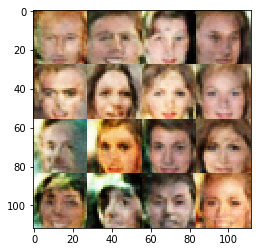

Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.5325
Epoch 1/1... Discriminator Loss: 1.5758... Generator Loss: 0.3898
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.6602
Epoch 1/1... Discriminator Loss: 1.2071... Generator Loss: 0.8794
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.5491
Epoch 1/1... Discriminator Loss: 1.4768... Generator Loss: 0.5916
Epoch 1/1... Discriminator Loss: 1.5640... Generator Loss: 0.4501
Epoch 1/1... Discriminator Loss: 1.5497... Generator Loss: 0.4483
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.5368


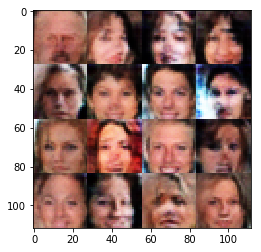

Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 0.7609
Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.5208
Epoch 1/1... Discriminator Loss: 0.7679... Generator Loss: 1.9152
Epoch 1/1... Discriminator Loss: 1.5210... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.2919... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.7410
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.6268
Epoch 1/1... Discriminator Loss: 1.0868... Generator Loss: 0.9066


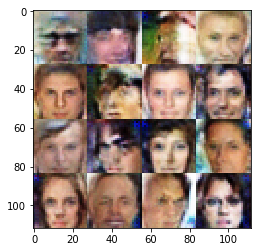

Epoch 1/1... Discriminator Loss: 1.3587... Generator Loss: 0.8542
Epoch 1/1... Discriminator Loss: 1.5126... Generator Loss: 0.5529
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.5096
Epoch 1/1... Discriminator Loss: 1.5678... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 1.0714
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.4858... Generator Loss: 0.4406
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.5019
Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.4155... Generator Loss: 0.7015


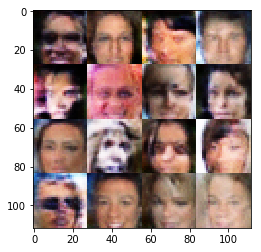

Epoch 1/1... Discriminator Loss: 1.7137... Generator Loss: 0.3368
Epoch 1/1... Discriminator Loss: 1.4361... Generator Loss: 0.5182
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.7691
Epoch 1/1... Discriminator Loss: 1.1341... Generator Loss: 0.9223
Epoch 1/1... Discriminator Loss: 1.5303... Generator Loss: 0.5629
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.5039
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.7717
Epoch 1/1... Discriminator Loss: 1.4400... Generator Loss: 0.5082
Epoch 1/1... Discriminator Loss: 1.9789... Generator Loss: 0.2574


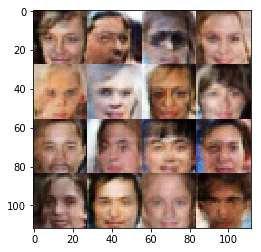

Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.3080... Generator Loss: 0.8118
Epoch 1/1... Discriminator Loss: 1.4263... Generator Loss: 0.7412
Epoch 1/1... Discriminator Loss: 1.6662... Generator Loss: 0.3762
Epoch 1/1... Discriminator Loss: 1.3254... Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.7015
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 0.8299
Epoch 1/1... Discriminator Loss: 1.7820... Generator Loss: 1.2908
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6668


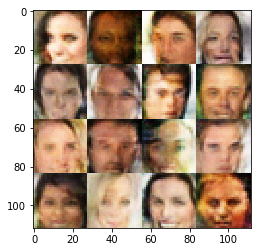

Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.5446
Epoch 1/1... Discriminator Loss: 1.4662... Generator Loss: 0.4855
Epoch 1/1... Discriminator Loss: 1.2511... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.5086... Generator Loss: 0.4992
Epoch 1/1... Discriminator Loss: 1.0327... Generator Loss: 1.2890
Epoch 1/1... Discriminator Loss: 1.2953... Generator Loss: 0.7412
Epoch 1/1... Discriminator Loss: 1.6201... Generator Loss: 0.4219
Epoch 1/1... Discriminator Loss: 1.2169... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.5574
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 1.0709


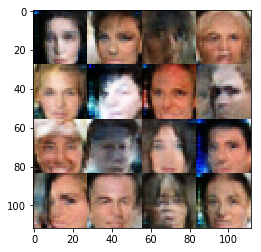

Epoch 1/1... Discriminator Loss: 1.5218... Generator Loss: 0.4421
Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.5670
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.5995
Epoch 1/1... Discriminator Loss: 1.6708... Generator Loss: 0.4148
Epoch 1/1... Discriminator Loss: 1.5171... Generator Loss: 0.6156
Epoch 1/1... Discriminator Loss: 1.6602... Generator Loss: 1.2078
Epoch 1/1... Discriminator Loss: 1.3476... Generator Loss: 0.6571
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.5841
Epoch 1/1... Discriminator Loss: 1.5366... Generator Loss: 0.4367
Epoch 1/1... Discriminator Loss: 1.1972... Generator Loss: 1.0201


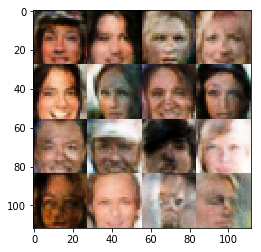

Epoch 1/1... Discriminator Loss: 1.3553... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.7356
Epoch 1/1... Discriminator Loss: 1.2111... Generator Loss: 0.6698
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.2746... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.1922... Generator Loss: 1.0638
Epoch 1/1... Discriminator Loss: 1.3469... Generator Loss: 0.6586


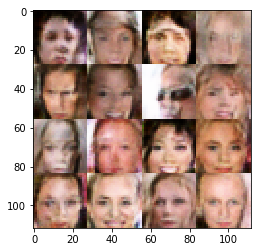

Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.5873
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.6550
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.7193
Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.2991... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.0778... Generator Loss: 1.1661
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.6534
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.9960


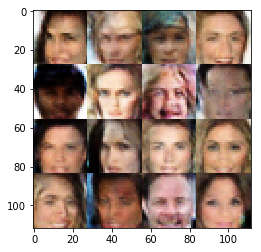

Epoch 1/1... Discriminator Loss: 1.5625... Generator Loss: 0.8991
Epoch 1/1... Discriminator Loss: 1.6713... Generator Loss: 0.3437
Epoch 1/1... Discriminator Loss: 1.3130... Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 0.6653
Epoch 1/1... Discriminator Loss: 1.6237... Generator Loss: 0.3897
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.5393
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.7063
Epoch 1/1... Discriminator Loss: 1.3189... Generator Loss: 0.7645
Epoch 1/1... Discriminator Loss: 1.4129... Generator Loss: 0.7788
Epoch 1/1... Discriminator Loss: 1.6709... Generator Loss: 0.3518


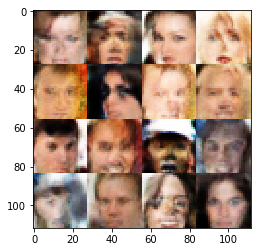

Epoch 1/1... Discriminator Loss: 1.1993... Generator Loss: 0.8731
Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.6211
Epoch 1/1... Discriminator Loss: 1.6006... Generator Loss: 0.4185
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.7003
Epoch 1/1... Discriminator Loss: 1.4619... Generator Loss: 0.5199
Epoch 1/1... Discriminator Loss: 1.5857... Generator Loss: 0.4053
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.5976
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 1.4997... Generator Loss: 0.7764
Epoch 1/1... Discriminator Loss: 1.4259... Generator Loss: 0.8926


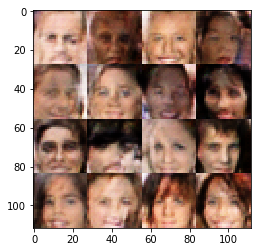

Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.3404... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.4670... Generator Loss: 0.5777
Epoch 1/1... Discriminator Loss: 1.2256... Generator Loss: 0.8983
Epoch 1/1... Discriminator Loss: 0.9289... Generator Loss: 1.4496
Epoch 1/1... Discriminator Loss: 1.6006... Generator Loss: 0.4417
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.8517
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.8958
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.5626


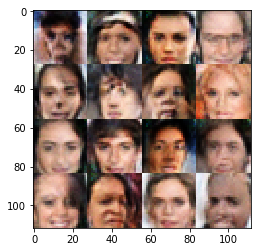

Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.5530
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 1.5384... Generator Loss: 0.4660
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.5293
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.7847
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 0.4634
Epoch 1/1... Discriminator Loss: 1.6233... Generator Loss: 0.4681
Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 1.4954... Generator Loss: 0.4881
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.5464


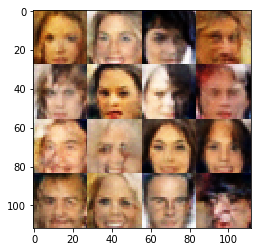

Epoch 1/1... Discriminator Loss: 1.6439... Generator Loss: 0.3737
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.7221
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.2237... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.5469... Generator Loss: 0.4853
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.5677... Generator Loss: 0.5457
Epoch 1/1... Discriminator Loss: 1.5318... Generator Loss: 0.5435
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 0.7975


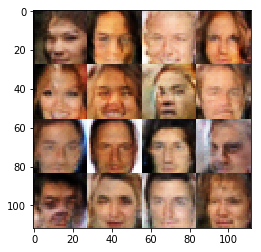

Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.8092
Epoch 1/1... Discriminator Loss: 1.4719... Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 1.2374... Generator Loss: 1.0111
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 1.7052... Generator Loss: 0.3771
Epoch 1/1... Discriminator Loss: 1.5615... Generator Loss: 0.4447
Epoch 1/1... Discriminator Loss: 1.2117... Generator Loss: 0.7453
Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 0.7538
Epoch 1/1... Discriminator Loss: 1.0802... Generator Loss: 0.7874


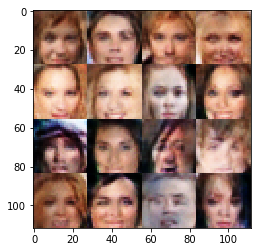

Epoch 1/1... Discriminator Loss: 1.2871... Generator Loss: 0.8024
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 0.6253
Epoch 1/1... Discriminator Loss: 1.5262... Generator Loss: 0.5048
Epoch 1/1... Discriminator Loss: 1.3340... Generator Loss: 0.6241
Epoch 1/1... Discriminator Loss: 1.1582... Generator Loss: 0.8701
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 0.7324
Epoch 1/1... Discriminator Loss: 1.3650... Generator Loss: 0.5502
Epoch 1/1... Discriminator Loss: 1.6125... Generator Loss: 0.4468
Epoch 1/1... Discriminator Loss: 1.5676... Generator Loss: 0.4600
Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.6530


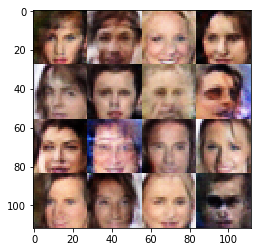

Epoch 1/1... Discriminator Loss: 1.5849... Generator Loss: 0.4208
Epoch 1/1... Discriminator Loss: 1.2663... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.5072... Generator Loss: 0.5134
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.5731
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 0.7803
Epoch 1/1... Discriminator Loss: 1.4649... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 0.6212
Epoch 1/1... Discriminator Loss: 1.4976... Generator Loss: 0.5711


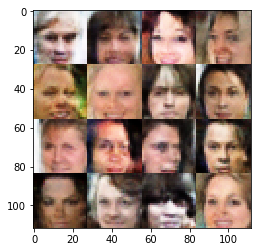

Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.5493
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 0.8538
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 1.7551... Generator Loss: 0.3619
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.5180
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.0802... Generator Loss: 1.4337
Epoch 1/1... Discriminator Loss: 1.2039... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.4995


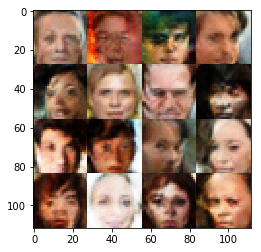

Epoch 1/1... Discriminator Loss: 1.4330... Generator Loss: 0.5217
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.7004... Generator Loss: 0.4230
Epoch 1/1... Discriminator Loss: 1.2453... Generator Loss: 0.7039
Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.3602... Generator Loss: 0.7063
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.5969
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.8323


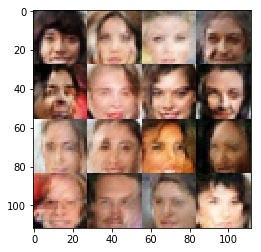

Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.6375
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.1316... Generator Loss: 0.7885
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 0.6705
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 1.4671... Generator Loss: 0.5672
Epoch 1/1... Discriminator Loss: 1.2548... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 1.5435... Generator Loss: 0.6107
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 0.7662


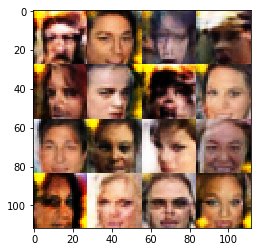

Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 0.6845
Epoch 1/1... Discriminator Loss: 1.0535... Generator Loss: 0.8075
Epoch 1/1... Discriminator Loss: 1.7144... Generator Loss: 0.3450
Epoch 1/1... Discriminator Loss: 1.5004... Generator Loss: 0.4985
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 1.1176
Epoch 1/1... Discriminator Loss: 1.1305... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.1152... Generator Loss: 0.9179
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.4238... Generator Loss: 0.5184
Epoch 1/1... Discriminator Loss: 1.5156... Generator Loss: 1.3118


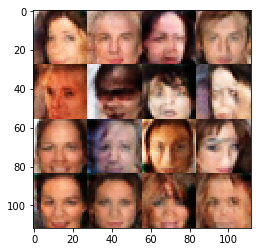

Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.5840
Epoch 1/1... Discriminator Loss: 1.3519... Generator Loss: 0.7565
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 0.4351
Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 0.8629
Epoch 1/1... Discriminator Loss: 1.2016... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.4262... Generator Loss: 0.4908
Epoch 1/1... Discriminator Loss: 1.3851... Generator Loss: 0.5436
Epoch 1/1... Discriminator Loss: 1.5618... Generator Loss: 0.4658
Epoch 1/1... Discriminator Loss: 1.6113... Generator Loss: 0.3990
Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 0.9087


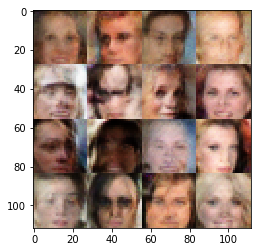

Epoch 1/1... Discriminator Loss: 1.4677... Generator Loss: 0.4793
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 1.0382
Epoch 1/1... Discriminator Loss: 1.4158... Generator Loss: 0.5689
Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.5747
Epoch 1/1... Discriminator Loss: 1.4937... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.1433... Generator Loss: 0.7934
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.6725
Epoch 1/1... Discriminator Loss: 1.2297... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 1.2835... Generator Loss: 0.8691
Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.6734


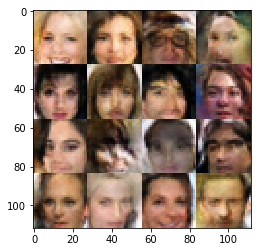

Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.5687
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.6404
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 0.7739
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.5335
Epoch 1/1... Discriminator Loss: 1.4704... Generator Loss: 0.4578
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 1.2871... Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 1.4927... Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.4343... Generator Loss: 0.5528
Epoch 1/1... Discriminator Loss: 1.4829... Generator Loss: 0.5047


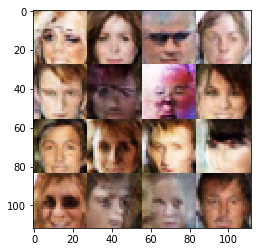

Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.6063
Epoch 1/1... Discriminator Loss: 1.7093... Generator Loss: 0.4316
Epoch 1/1... Discriminator Loss: 1.2552... Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 1.2473... Generator Loss: 0.8756
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.6040
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6194
Epoch 1/1... Discriminator Loss: 1.2699... Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.3116... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 1.1851... Generator Loss: 0.7919
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.5973


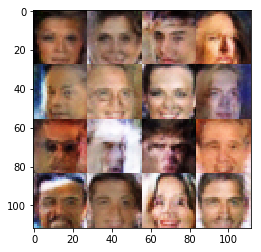

Epoch 1/1... Discriminator Loss: 1.8457... Generator Loss: 0.3120
Epoch 1/1... Discriminator Loss: 1.4643... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.7760
Epoch 1/1... Discriminator Loss: 1.3203... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.4719... Generator Loss: 0.5075
Epoch 1/1... Discriminator Loss: 1.1602... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.4958... Generator Loss: 0.5057
Epoch 1/1... Discriminator Loss: 1.5600... Generator Loss: 0.5923
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.5806


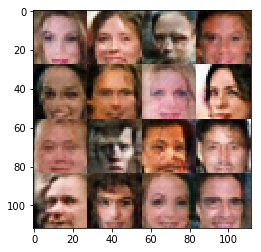

Epoch 1/1... Discriminator Loss: 1.4905... Generator Loss: 0.4998
Epoch 1/1... Discriminator Loss: 1.7535... Generator Loss: 0.4245
Epoch 1/1... Discriminator Loss: 1.5557... Generator Loss: 0.4327
Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 0.8446
Epoch 1/1... Discriminator Loss: 1.2359... Generator Loss: 0.7642
Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.6230... Generator Loss: 0.4065
Epoch 1/1... Discriminator Loss: 1.5091... Generator Loss: 0.5235


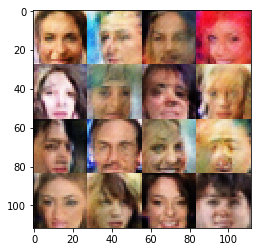

Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.4358... Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 1.1547... Generator Loss: 0.8981
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.1728... Generator Loss: 0.8828
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.5998
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.3384... Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.6868


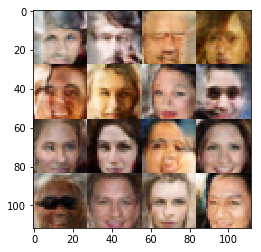

Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.2851... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.4837... Generator Loss: 0.5173
Epoch 1/1... Discriminator Loss: 1.2220... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.7150
Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 0.6013
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.6089
Epoch 1/1... Discriminator Loss: 1.5970... Generator Loss: 0.4678
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 1.4198... Generator Loss: 0.5881


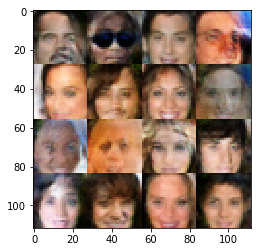

Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.9135
Epoch 1/1... Discriminator Loss: 1.5908... Generator Loss: 0.4204
Epoch 1/1... Discriminator Loss: 1.5998... Generator Loss: 0.4051
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.4033... Generator Loss: 0.5939
Epoch 1/1... Discriminator Loss: 1.5359... Generator Loss: 0.5084


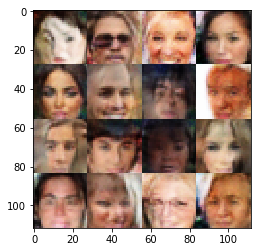

Epoch 1/1... Discriminator Loss: 1.4805... Generator Loss: 0.4697
Epoch 1/1... Discriminator Loss: 1.3194... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.6478
Epoch 1/1... Discriminator Loss: 1.4959... Generator Loss: 0.5275
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 0.6751
Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.5377
Epoch 1/1... Discriminator Loss: 1.6459... Generator Loss: 0.4041
Epoch 1/1... Discriminator Loss: 1.2155... Generator Loss: 0.7408
Epoch 1/1... Discriminator Loss: 1.2649... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.2984... Generator Loss: 0.7682


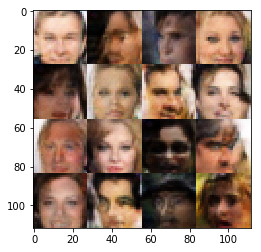

Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 0.7794
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.4033... Generator Loss: 0.6389
Epoch 1/1... Discriminator Loss: 1.5353... Generator Loss: 0.4419
Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.7953
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.3104... Generator Loss: 0.6804


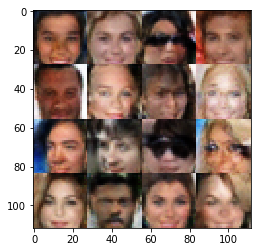

Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.5642
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 0.7658
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.5438


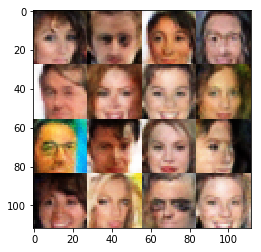

In [42]:
batch_size = 32
z_dim = 100
learning_rate = 0.0004 #Reviewer suggested lr = (0.0002, 0.0008)
beta1 = 0.35 #Reviewer suggested beta1 = (0.2, 0.5)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    losses = train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

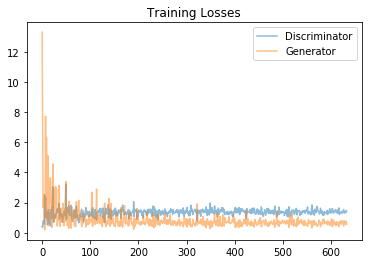

In [43]:
#From DCGAN exercise
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## For the Result Comparison

#### Trial#1
This loss graph is for
[alpha = 0.2, using dropout, batch_size=60, before adding one layer to the generator network, and smoothing]

<img src='trial1_face.png'>


#### Trial#2

alpha = 0.1, w/o dropout, batch_size = 64, adding one layer to the generator network, and smoothing

<img src='trial2_face.png'>


<img src='trial2_loss.png'>


#### Trial#3

batch_size =32

<img src='trial3_face.png'>


<img src='trial3_loss.png'>

#### Trial#4

xavier_initializer

<img src='trial4_face.png'>

<img src='trial4_loss.png'>

#### Trial#5

xavier_initializer + batch_size=64

<img src='trial5_face.png'>

<img src='trial5_loss.png'>

#### Trial#6

xavier_initializer + batch_size=64, beta1 = 0.3

<img src='trial6_face.png'>

<img src='trial6_loss.png'>

#### Trial#7

xavier_initializer + batch_size=32, beta1 = 0.35

<img src='trial7_face.png'>

<img src='trial7_loss.png'>

#### Trial#7

xavier_initializer + batch_size=32, beta1 = 0.35, lr = 0.0004

<img src='trial8_face.png'>

<img src='trial8_loss.png'>

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.